#### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_data = pd.read_csv("./iris_data.data")

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [7]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [9]:
iris_data.replace({'class': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}, inplace=True)

In [10]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Data Visualization

In [11]:
sns.set()

<AxesSubplot: xlabel='sepal_length', ylabel='count'>

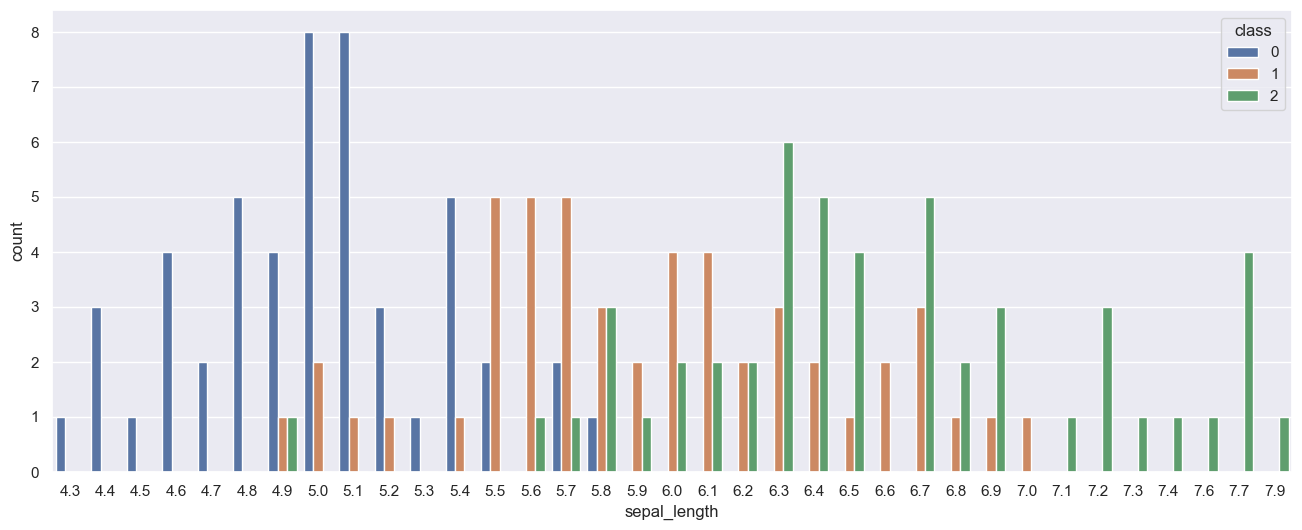

In [12]:
plt.figure(figsize=(16, 6))
sns.countplot(x='sepal_length', hue="class", data=iris_data)

<AxesSubplot: xlabel='sepal_width', ylabel='count'>

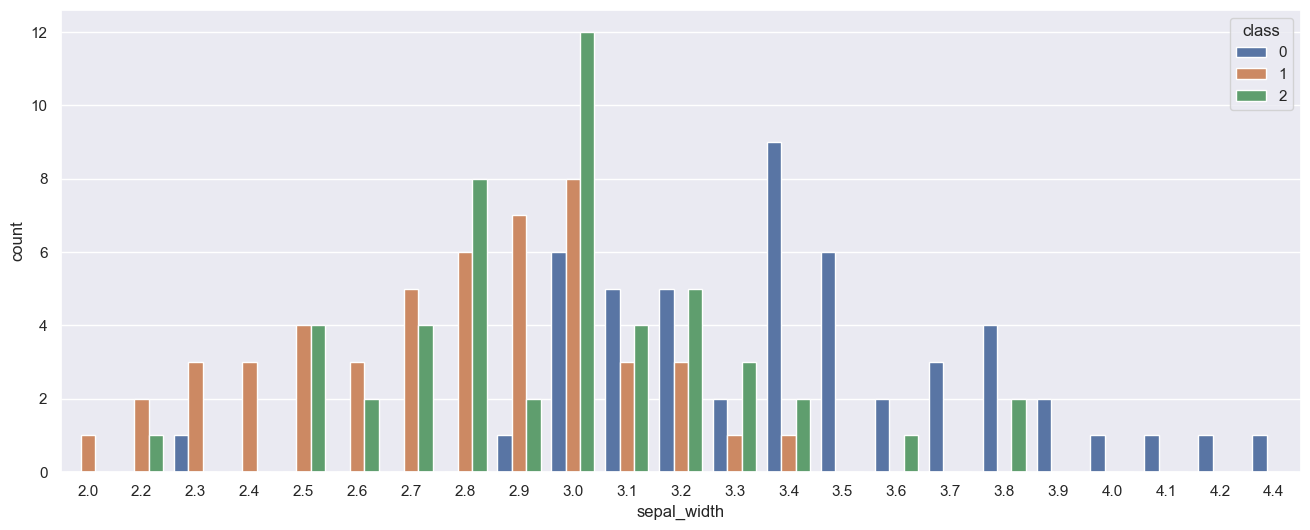

In [13]:
plt.figure(figsize=(16, 6))

sns.countplot(x='sepal_width', hue="class", data=iris_data)

#### Correlation

In [14]:
correlation = iris_data.corr()

<AxesSubplot: >

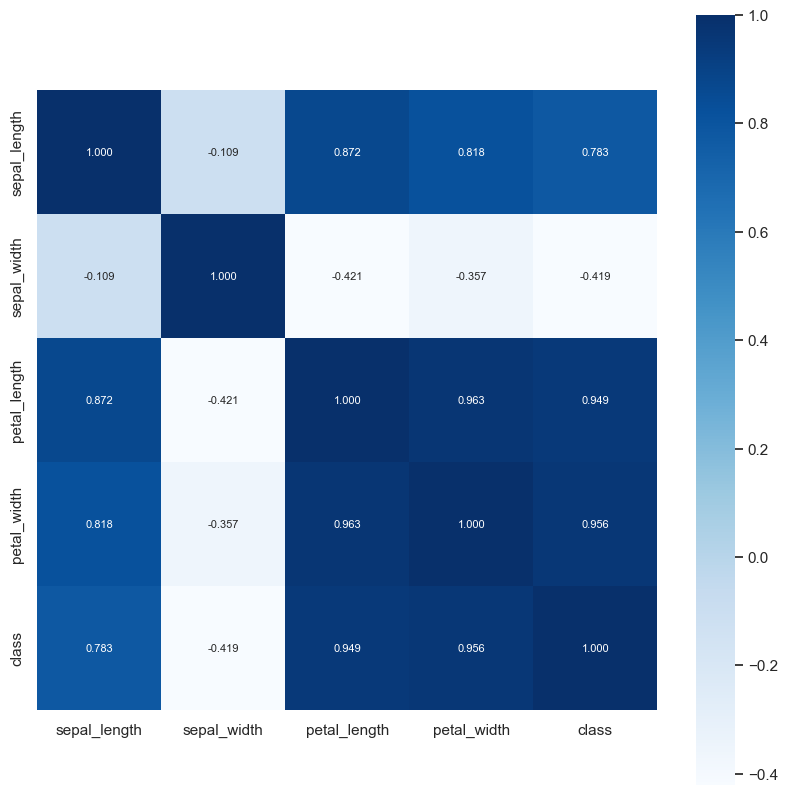

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt="0.3f", annot=True, annot_kws={'size': 8}, cmap="Blues")

#### Splitting data into Features and Target

In [16]:
X = iris_data.drop(columns="class", axis=1)
Y = iris_data['class']

In [17]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [19]:
Y.value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

#### Splitting data into Train and Test data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


#### Model Training

In [22]:
model=GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [23]:
Y_predict_train= model.predict(X_train)
acc_train = accuracy_score(Y_train, Y_predict_train)

In [24]:
acc_train

0.95

In [25]:
Y_predict_test = model.predict(X_test)
acc_test = accuracy_score(Y_test, Y_predict_test)

In [26]:
acc_test

1.0